In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [12]:
NUMERICAL_COLS = [
  'crim', # numerical
  'zn', # numerical
  'nonretail', # numerical
  'nox', # numerical
  'rooms', # numerical
  'age', # numerical
  'dis', # numerical
  'rad', # numerical
  'tax', # numerical
  'ptratio', # numerical
  'b', # numerical
  'lstat', # numerical
]

NO_TRANSFORM = ['river']

In [27]:
 def get_data():
    dataframe = pd.read_csv('./datasets/housing.data', header=None, delim_whitespace=True)
  # dataset does not have headers so we must manually rename the columns
    dataframe.columns = [
    'crim', # numerical
    'zn', # numerical
    'nonretail', # numerical
    'river', # binary
    'nox', # numerical
    'rooms', # numerical
    'age', # numerical
    'dis', # numerical
    'rad', # numerical
    'tax', # numerical
    'ptratio', # numerical
    'b', # numerical
    'lstat', # numerical
    'medv', # numerical -- this is the target
    ]
    return dataframe

# Data Cleaning

In [44]:
dataset_df = get_data()

N = len(dataset_df)

X = dataset_df.loc[:, dataset_df.columns != 'medv']
y = dataset_df.loc[:, dataset_df.columns == 'medv']


scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.log(y) # Here we care about relative error so we use log of y (being 5k off on 10k price is different than if price is 100k)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X train", X_train)
print("Y train", y_train)

X train [[-0.41704368 -0.48772236 -1.30687771 ...  0.1130321   0.41057102
  -1.04332233]
 [-0.40520503 -0.48772236 -0.16440754 ... -0.30309415  0.40158024
  -0.08593539]
 [-0.40056872 -0.48772236 -0.61672651 ... -0.2568579   0.44105193
  -0.34245342]
 ...
 [-0.41877066  2.94584308 -1.3316823  ... -0.67298414  0.37570436
  -0.93398678]
 [ 0.87825441 -0.48772236  1.01599907 ...  0.80657583 -2.70626713
   1.48821619]
 [-0.39389588 -0.48772236 -0.37597609 ...  1.13022958 -3.13442533
  -0.28358043]]
Y train          medv
5    3.356897
116  3.054001
45   2.960105
16   3.139833
468  2.949688
..        ...
106  2.970414
270  3.049273
348  3.198673
435  2.595255
102  2.923162

[354 rows x 1 columns]


# Random Forest

In [62]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, np.ravel(y_train))
rf_predictions = rf_model.predict(X_test)

ymin: [2.] ymax: [4.]


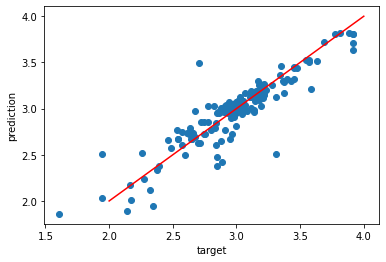

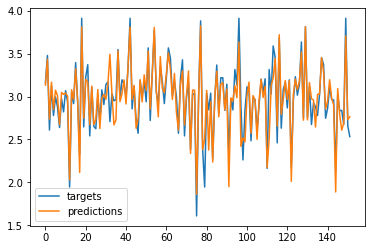

In [79]:
plt.scatter(y_test, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
ymin = np.round( min( min(y_test.values), min(predictions) ) )
ymax = np.ceil( max( max(y_test.values), max(predictions) ) )
print("ymin:", ymin, "ymax:", ymax)
r = range(int(ymin), int(ymax) + 1)
plt.plot(r, r, 'r')
plt.show()

plt.plot(y_test.values, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

# Baseline test

In [99]:
baseline = LinearRegression()
single_tree = DecisionTreeRegressor()
print("Test single tree:", cross_val_score(single_tree, X_train, np.ravel(y_train.values), cv=5).mean())
print("CV baseline:", cross_val_score(baseline, X_train, np.ravel(y_train.values), cv=5).mean())
print("CV forest:", cross_val_score(rf_model, X_train, np.ravel(y_train.values), cv=5).mean())

single_tree.fit(X_train, y_train)
baseline.fit(X_train, y_train)
print("test score single tree:", single_tree.score(X_test, y_test.values))
print("test score baseline:", baseline.score(X_test, y_test.values))
print("test score forest:", rf_model.score(X_test, y_test.values))

CV single tree: 0.6743260054262744
CV baseline: 0.736088300989379
CV forest: 0.8217047485755902
test score single tree: 0.701046335927231
test score baseline: 0.7604694880606343
test score forest: 0.8285482452899683
